In [1]:
from PIL import Image

def get_center(img_with_pth):
    im = Image.open(img_with_pth).convert('RGB')

    x, y = im.size
    
    coords = []

    for y_indx in range(y):
        for x_indx in range(x):
   
            red, green, blue = im.getpixel((x_indx, y_indx))


            if red != 0 and green != 0 and blue != 0 and red > 30 and green > 30 and blue > 30:
                coords.append((x_indx, y_indx))

    max_x, max_y = coords[0]
    min_x, min_y = coords[0]

    for cord in coords:
        temp_x, temp_y = cord

        if temp_x > max_x:
            max_x = temp_x

        if temp_y > max_y:
            max_y = temp_y

        if temp_x < min_x:
            min_x = temp_x

        if temp_y < min_y:
            min_y = temp_x
            
    center_x = (float(max_x)+min_x)/2

    center_y = (float(max_y)+min_y)/2
    
    return (center_x, center_y)

In [2]:
def max_min_xy(img_with_pth):
    im = Image.open(img_with_pth).convert('RGB')

    x, y = im.size
    
    coords = []

    for y_indx in range(y):
        for x_indx in range(x):
   
            red, green, blue = im.getpixel((x_indx, y_indx))


            if red != 0 and green != 0 and blue != 0 and red > 30 and green > 30 and blue > 30:
                coords.append((x_indx, y_indx))

    max_x, max_y = coords[0]
    min_x, min_y = coords[0]

    for cord in coords:
        temp_x, temp_y = cord

        if temp_x > max_x:
            max_x = temp_x

        if temp_y > max_y:
            max_y = temp_y

        if temp_x < min_x:
            min_x = temp_x

        if temp_y < min_y:
            min_y = temp_x
            
#     center_x = (float(max_x)+min_x)/2

#     center_y = (float(max_y)+min_y)/2
    
    return (min_x, min_y, max_x, max_y)

In [3]:
# x_cnt, y_cnt = get_center("/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/img/inf.png")

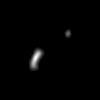

In [8]:
x_cnt, y_cnt = get_center("/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/img/fri_0.jpg")

tst = Image.open("/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/img/fri_0.jpg").convert('RGB')

cropped = tst.crop((x_cnt-50, y_cnt-50, x_cnt+50, y_cnt+50))

# cropped.show()

display(cropped)

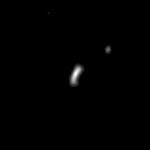

In [9]:
display(tst)

In [10]:
tst.size

(150, 150)

In [11]:
cropped.size

(100, 100)

In [60]:
from astropy.io import fits

In [61]:
image_file = '/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/img/config-i-0.fits'

config_file = fits.open('/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/img/config-i-0.fits')

In [62]:
config_file.info()


Filename: /home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/img/config-i-0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     195   (300, 300)   float32   


In [63]:
len(config_file)

1

In [64]:
image_data = config_file[0].data

In [65]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(300, 300)


In [66]:
config_file.close()

In [67]:
image_data = fits.getdata(image_file)

print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(300, 300)


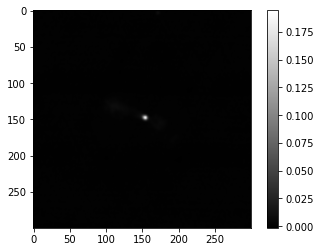

In [68]:
import matplotlib.pyplot as plt

plt.imshow(image_data, cmap='gray')
plt.colorbar()

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [69]:
image = Image.fromarray(image_data)

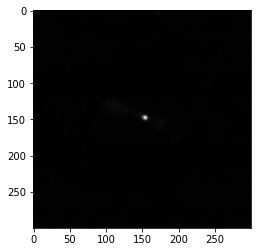

In [70]:
import numpy as np

plt.imshow(np.array(image_data).reshape(300, 300), cmap='gray')


In [71]:
import matplotlib 

matplotlib.image.imsave('name.png', image_data, cmap='gray')

In [88]:
x_cnt, y_cnt = get_center('/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/test/' + 'config-i-0.png')

In [97]:
display('/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/test/' + 'config-i-0.png')

'/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/test/config-i-0.png'

In [89]:
x_cnt

153.5

In [90]:
y_cnt

147.5

In [116]:
t_im = Image.open("/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/test/"+'config-i-0.png')

In [119]:
cropped = t_im.crop((x_cnt-50, y_cnt-50, x_cnt+50, y_cnt+50))

In [98]:
153.5-50


103.5

In [99]:
147.5-50

97.5

In [102]:
153.5+50


203.5

In [103]:
147.5+50

197.5

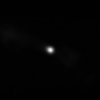

In [120]:
display(cropped)

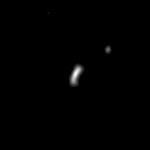

In [104]:
display(t_im)

In [128]:
def crop_config(cfile_w_path, path_to_destination, disp=False, disp_crop=False):
    path_to_destination = path_to_destination + cfile_name[:-5]+'.png'
    config_file = fits.open(cfile_w_path)
    image_data = config_file[0].data
    config_file.close()
    image_data = fits.getdata(image_file)
    matplotlib.image.imsave(path_to_destination, image_data, cmap='gray')
    
    if (disp==True):
        plt.imshow(np.array(image_data).reshape(300, 300), cmap='gray')
        
    x_cnt, y_cnt = get_center(path_to_destination)
    
    t_im = Image.open(path_to_destination).convert('RGB')

    cropped = t_im.crop((x_cnt-75, y_cnt-75, x_cnt+75, y_cnt+75))
    
    if (disp_crop==True):
        display(cropped)
        
    return cropped



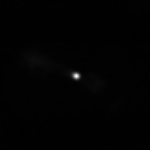

In [140]:
base_path = '/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/img/'
cfile_name = 'config-i-0.fits'
cfile_w_path = base_path+cfile_name
path_to_destination = './test/' 
    
t = crop_config(cfile_w_path, path_to_destination, disp_crop=True)

In [141]:
t.size

(150, 150)

In [139]:
matplotlib.image.imsave('tea.png', t, cmap='gray')

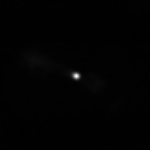

In [142]:
display(t)

In [143]:
type(t)

PIL.Image.Image

In [76]:
cfile_name[:-5]

'config-i-0'

In [52]:
config_file = fits.open(cfile_w_path)

In [53]:
image_data = config_file[0].data

In [54]:
image_data = fits.getdata(image_file)

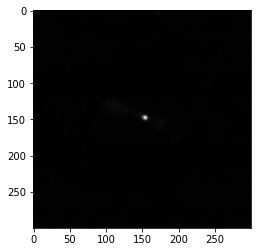

In [58]:
plt.imshow(np.array(image_data).reshape(300, 300), cmap='gray')


In [132]:
def crop_config(cfile_w_path, path_to_destination, disp=False, disp_crop=False):
    path_to_destination = path_to_destination + cfile_name[:-5]+'.png'
    config_file = fits.open(cfile_w_path)
    image_data = config_file[0].data
    config_file.close()
    image_data = fits.getdata(image_file)
    matplotlib.image.imsave(path_to_destination, image_data, cmap='gray')
    
    if (disp==True):
        plt.imshow(np.array(image_data).reshape(300, 300), cmap='gray')
        
    x_cnt, y_cnt = get_center(path_to_destination)
    
    t_im = Image.open(path_to_destination).convert('RGB')

    cropped = t_im.crop((x_cnt-75, y_cnt-75, x_cnt+75, y_cnt+75))
    
    if (disp_crop==True):
        display(cropped)
        
    return cropped



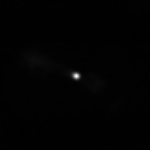

In [133]:
base_path = '/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/img/'
cfile_name = 'config-i-0.fits'
cfile_w_path = base_path+cfile_name
path_to_destination = './test/' 
    
t = crop_config(cfile_w_path, path_to_destination, disp_crop=True)

In [137]:
from os import listdir
from os.path import isfile, join

fits_files_dir = '/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/img/'

fits_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [138]:
onlyfiles

['fri_0.jpg',
 'config-i-0.fits',
 'c dot.png',
 'test.png',
 'black-dot.jpg',
 'circle.png',
 'inf.png']

In [ ]:
for fl in onlyfiles:
    base_path = fits_files_dir
    cfile_name = fl
    cfile_w_path = base_path+cfile_name
    path_to_destination = './test/' 
    
t = crop_config(cfile_w_path, path_to_destination, disp_crop=True)